## **Exercise 2: KNN**
In this exercise, you will be building a KNN model using raw data and then using normalized data to explore how KNN is affected by the range of feature values.

**A)** Import libraries and load the breast cancer dataset.

**B)** Split the data into training and testing.

**C)** Train a KNN model and calculate its accuracy.

**D)** Deployment

**E)** Train a DT model and calculate its accuracy.

**F)** Hyperparameter tuning

#### **A)** Import needed libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Import LabelEncoder here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the credit_score dataset
data = pd.read_csv('credit_score.csv')  # Make sure the dataset is in the same directory or provide the full path

# Display the first few rows of the dataset
print(data.head())

# Separate features and target
# Replace 'Credit_Score' with the correct target column name from your dataset
X = data.drop(['Credit_Score'], axis=1)
y = data['Credit_Score']


     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (80000, 27)
Testing set shape: (20000, 27)


In [ ]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Default number of neighbors is 5
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy (Raw Data): {knn_accuracy:.2f}")


KNN Model Accuracy (Raw Data): 0.80


In [ ]:
# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on normalized data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predict on normalized testing data
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

# Calculate accuracy
knn_scaled_accuracy = accuracy_score(y_test, y_pred_knn_scaled)
print(f"KNN Model Accuracy (Normalized Data): {knn_scaled_accuracy:.2f}")


KNN Model Accuracy (Normalized Data): 0.77


In [ ]:
# Initialize and train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")


Decision Tree Model Accuracy: 0.76


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt.fit(X_train, y_train)

# Create a zero input with feature names as a DataFrame
zero_input = pd.DataFrame([np.zeros(X_train.shape[1])], columns=X_train.columns)

# Predict using the trained Decision Tree
one_pred = dt.predict(zero_input)

# Print the prediction
print("Prediction for zero input:", one_pred)


Prediction for zero input: ['Good']


In [ ]:
# Display the shape of X_train
print("Shape of X_train:", X_train.shape)


Shape of X_train: (80000, 27)


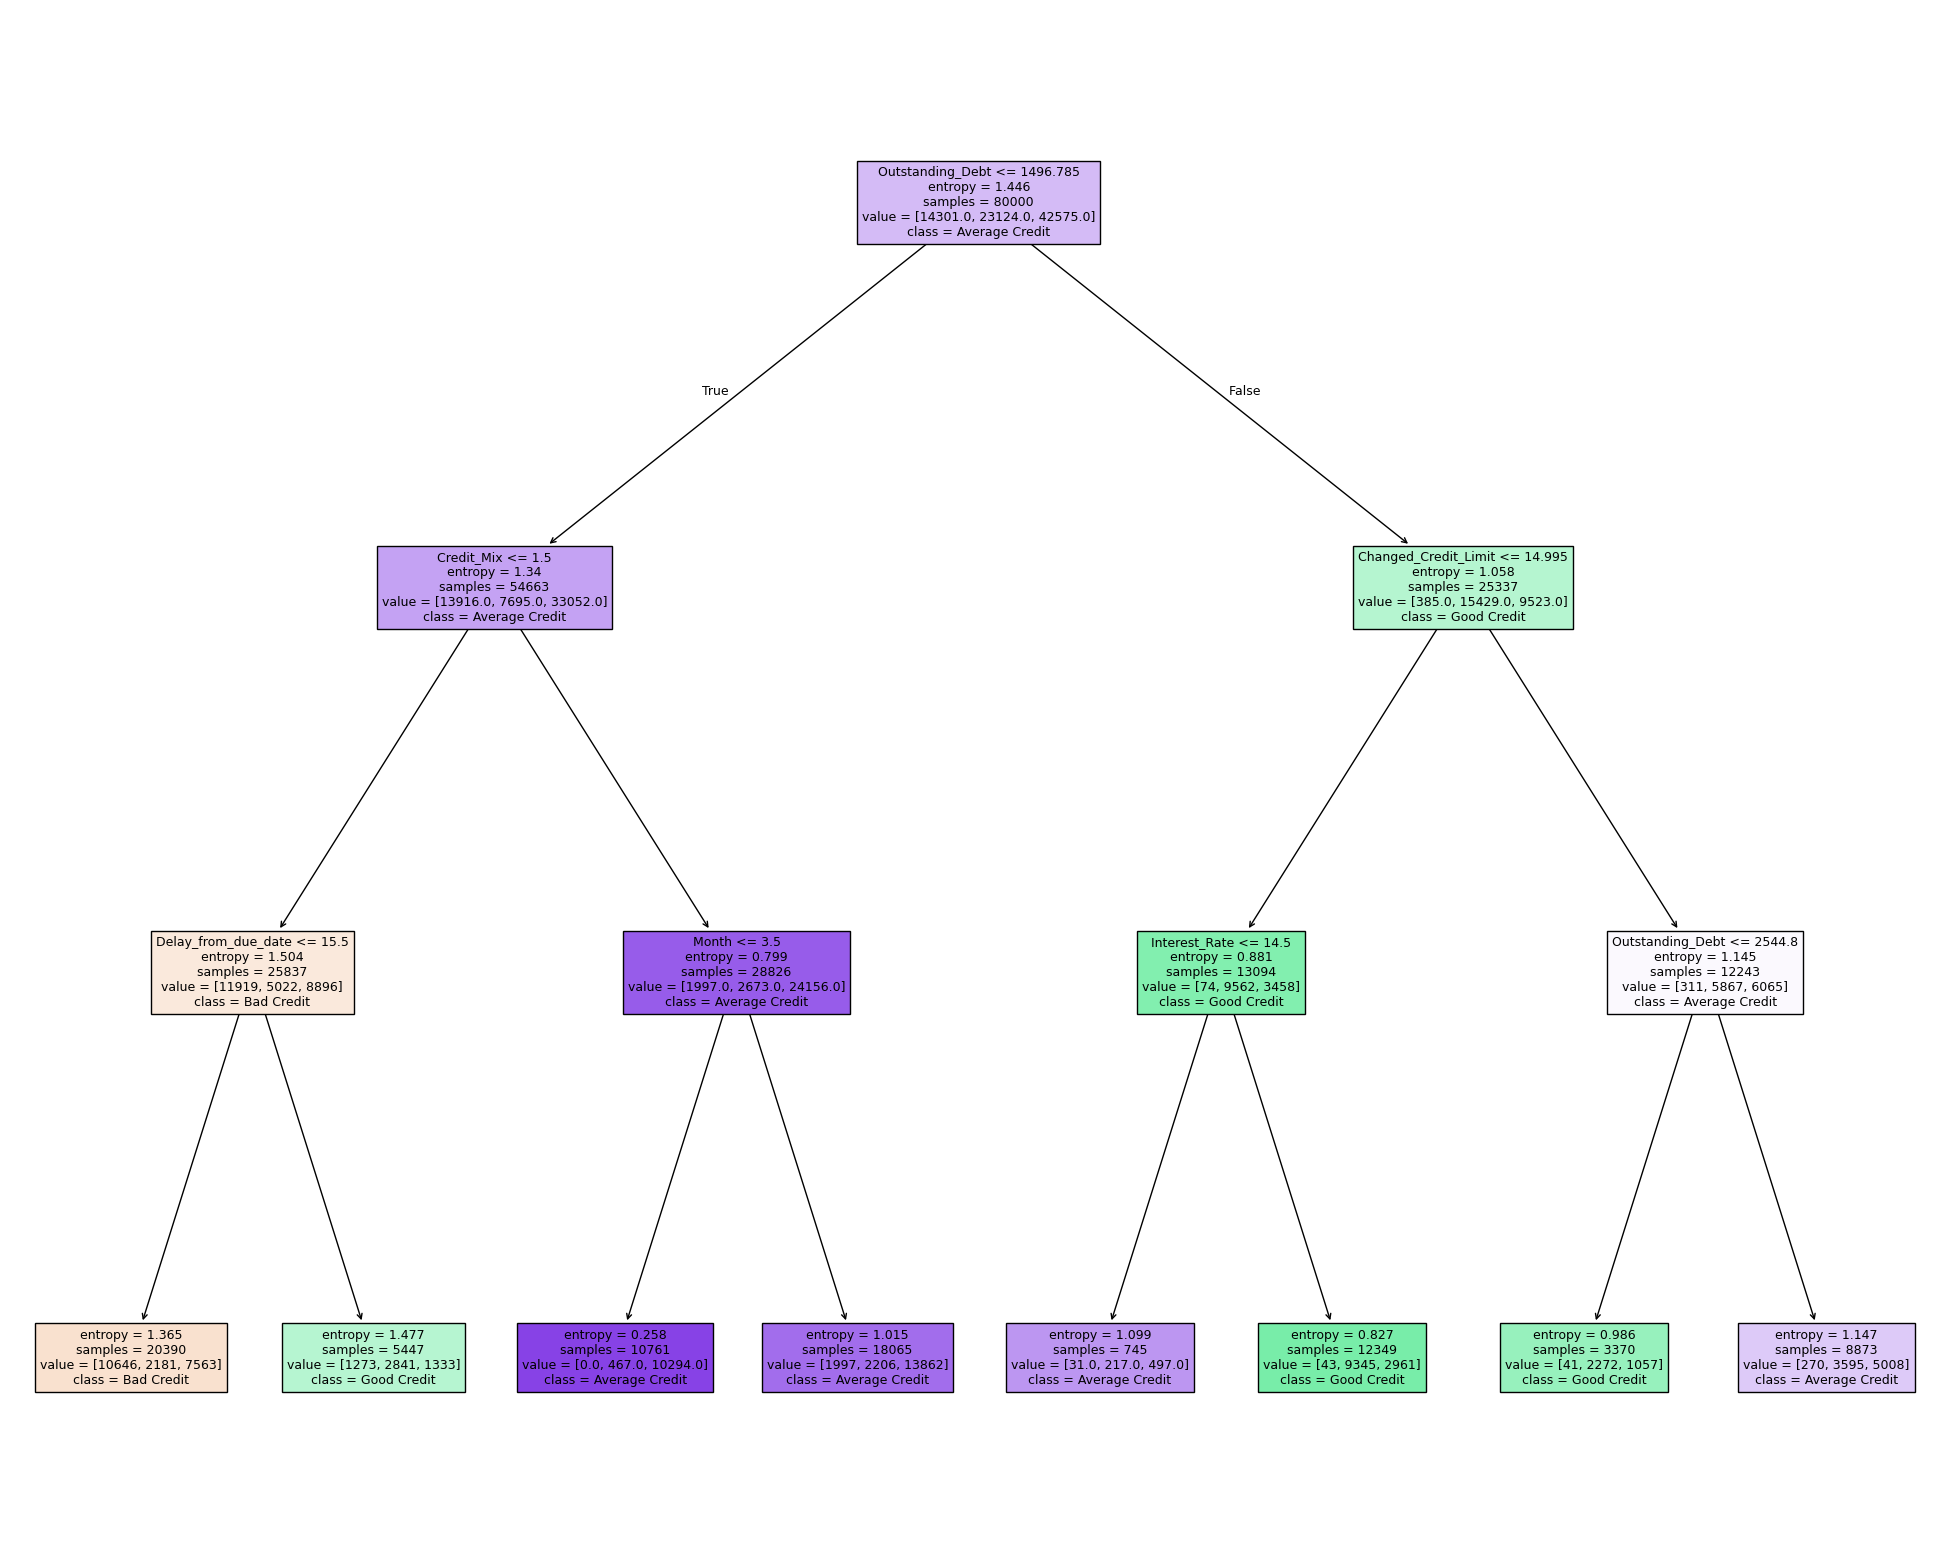

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming `dt` is your trained DecisionTreeClassifier model
# Update class_names and feature_names based on your dataset
fig = plt.figure(figsize=(25, 20))

_ = tree.plot_tree(dt,
                   feature_names=X_train.columns,  # Feature names from your dataset
                   class_names=['Bad Credit', 'Good Credit', 'Average Credit'],  # Replace with your actual class names
                   filled=True)

plt.show()


In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix = confusion_matrix(y_train, y_train_pred)

0.6845625


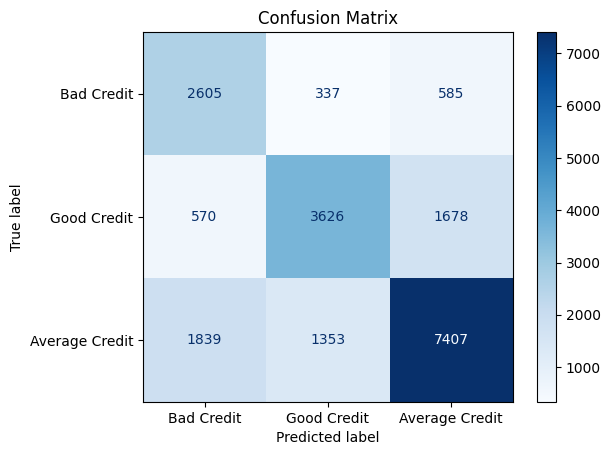

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for test predictions
confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Bad Credit', 'Good Credit', 'Average Credit'])
cm_display.plot(cmap='Blues')  # Optional: Set color map to 'Blues'
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
params = {
    'max_depth': [2, 3, 5, 10, 20],                # Control the depth of the tree
    'min_samples_leaf': [5, 10, 20, 50, 100],      # Minimum samples per leaf
    'criterion': ["gini", "entropy"]               # Splitting criteria
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Use the best model to predict on the test set
best_dt = grid_search.best_estimator_
y_test_pred = best_dt.predict(X_test)

# Print the accuracy on the test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with Best Model:", test_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Best Cross-Validated Accuracy: 0.7335624999999999
Test Accuracy with Best Model: 0.7537


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameters for the Decision Tree
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with the specified parameters
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=params,
    cv=4,                # 4-fold cross-validation
    n_jobs=-1,           # Use all available cores
    verbose=1,           # Display progress
    scoring="accuracy"   # Optimize for accuracy
)

# Fit the GridSearchCV with training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Use the best model to predict on the test set
best_dt = grid_search.best_estimator_
y_test_pred = best_dt.predict(X_test)

# Calculate and display the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with Best Model:", test_accuracy)

# Convert GridSearchCV results to a DataFrame
score_df = pd.DataFrame(grid_search.cv_results_)

# Display the top rows of the DataFrame
print("Top rows of the GridSearchCV results:")
print(score_df.head())

# Sort the DataFrame by the best mean test score
sorted_score_df = score_df.sort_values(by="mean_test_score", ascending=False)
print("Top configurations sorted by mean test score:")
print(sorted_score_df[['params', 'mean_test_score', 'std_test_score']].head())


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Best Cross-Validated Accuracy: 0.733525
Test Accuracy with Best Model: 0.7533
Top rows of the GridSearchCV results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.868177      0.164508         0.074786        0.018573   
1       1.024275      0.083123         0.103043        0.003976   
2       0.914564      0.260357         0.079300        0.026796   
3       0.573479      0.010089         0.053096        0.002155   
4       0.582813      0.012273         0.052671        0.001676   

  param_criterion  param_max_depth  param_min_samples_leaf  \
0            gini                2                       5   
1            gini                2                      10   
2            gini                2                      20   
3            gini                2                      50   
4            gini          

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # Make sure seaborn is imported
import matplotlib.pyplot as plt

# Assuming 'credit_score.csv' is your dataset file
original_data = pd.read_csv('credit_score.csv')  # Load the data


# *** Data Preprocessing ***
# ... (your existing code for handling outliers and missing values) ...


# Define numerical_columns here:
numerical_columns = original_data.select_dtypes(include=np.number).columns.tolist()


if len(numerical_columns) > 0:
    print("\nBoxplots for Numerical Attributes:")
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        # Use original_data instead of data for boxplots:
        sns.boxplot(x=original_data[col], color='skyblue')
        plt.title(f'Boxplot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.grid(axis='y')
        plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset here (replace 'credit_score.csv' with your file)
data = pd.read_csv('credit_score.csv')

# Preparing the dataset
X = data[['Annual_Income', 'Num_Bank_Accounts', 'Outstanding_Debt']]  # Example features
y = data['Credit_Score']  # Target variable

# Encode the target variable if it is categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encoding 'Good', 'Standard', 'Poor' to numerical values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
print(f"Weighted F1-score: {f1:.4f}")

# Displaying the full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Weighted F1-score: 0.8059

Classification Report:

              precision    recall  f1-score   support

        Good       0.75      0.79      0.77      3527
        Poor       0.79      0.85      0.82      5874
    Standard       0.83      0.79      0.81     10599

    accuracy                           0.81     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



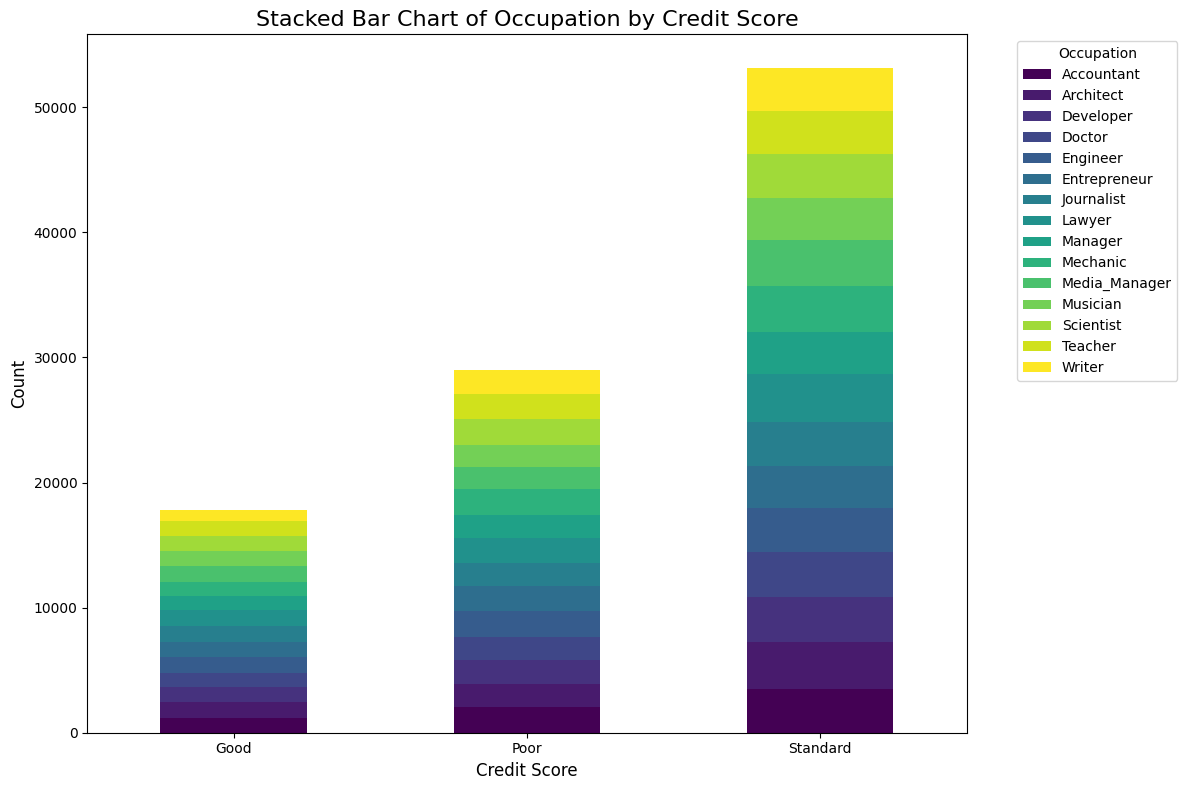

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset loaded as a pandas DataFrame

# Grouping data for the stacked bar chart
stack_data = data.groupby(['Credit_Score', 'Occupation']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
stack_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding labels and title
plt.title('Stacked Bar Chart of Occupation by Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-6-cb57ca43a18a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores = data.groupby(['Age_Group', 'Credit_Score'])['Credit_Score_Numeric'].mean().unstack()


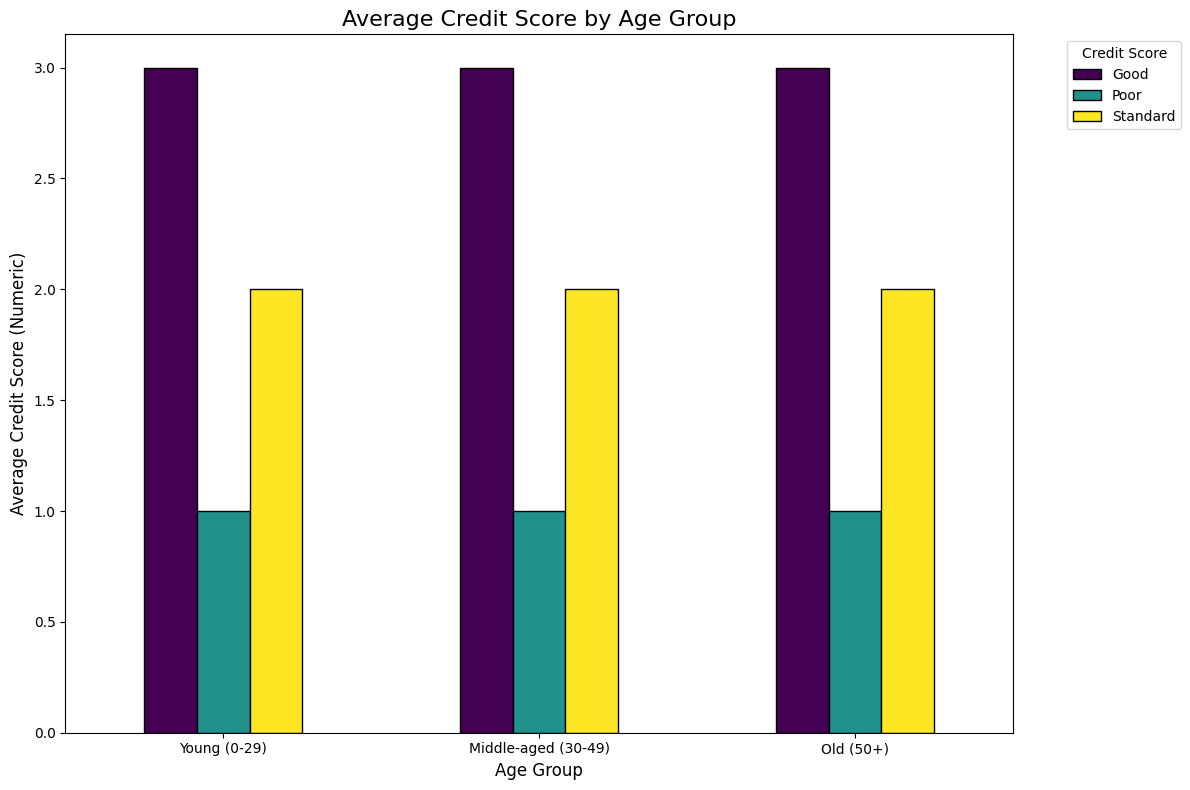

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset loaded as a pandas DataFrame

# Step 1: Define age groups with ranges
bins = [0, 29, 49, 100]  # Define the age ranges
labels = ['Young (0-29)', 'Middle-aged (30-49)', 'Old (50+)']  # Labels with ranges
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Step 2: Assign numerical values for Credit_Score
credit_score_mapping = {'Good': 3, 'Standard': 2, 'Poor': 1}
data['Credit_Score_Numeric'] = data['Credit_Score'].map(credit_score_mapping)

# Step 3: Calculate average Credit_Score for each age group
average_scores = data.groupby(['Age_Group', 'Credit_Score'])['Credit_Score_Numeric'].mean().unstack()

# Step 4: Plot the data
average_scores.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Customize the plot
plt.title('Average Credit Score by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Credit Score (Numeric)', fontsize=12)
plt.xticks(rotation=0)  # Ensure age group labels with ranges are visible
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd  # Make sure pandas is imported

# Load your dataset here (replace 'credit_score.csv' with your file)
data = pd.read_csv('credit_score.csv')

# Now you can use 'data' to access the DataFrame
data['Credit_Score'].value_counts()


,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
import numpy as np  # Import NumPy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Splitting the dataset into features and target variable
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Identify and encode non-numeric features
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    # Replace 'Tomz' with NaN before encoding
    X[col] = X[col].replace('Tomz', np.nan)
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Handling missing or invalid data
# This step is now redundant since 'Tomz' was already replaced with NaN
# X = X.replace('Tomz', np.nan)  # Replace 'Tomz' with NaN
X = X.dropna()  # Drop rows with NaN


# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check balanced class distribution
print("Original class distribution:\n", y.value_counts())
print("Balanced class distribution:\n", y_train_balanced.value_counts())

Original class distribution:
 Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Balanced class distribution:
 Credit_Score
Standard    42575
Good        42575
Poor        42575
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling
X_over, y_over = oversampler.fit_resample(X, y)

# Check class distribution after oversampling
print("Class distribution after oversampling:")
print(y_over.value_counts())

Class distribution after oversampling:
Credit_Score
Good        53174
Standard    53174
Poor        53174
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_under, y_under = undersampler.fit_resample(X, y)

# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(y_under.value_counts())

Class distribution after undersampling:
Credit_Score
Good        17828
Poor        17828
Standard    17828
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN (SMOTE + Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=42)

# Apply combined sampling
X_combined, y_combined = smote_enn.fit_resample(X, y)

# Check class distribution after combined sampling
print("Class distribution after combined sampling:")
print(y_combined.value_counts())

Class distribution after combined sampling:
Credit_Score
Good        41344
Poor        38170
Standard    34403
Name: count, dtype: int64


    Age  Annual_Income  Num_Bank_Accounts  Num_of_Loan Credit_Score
0  23.0       19114.12                3.0          4.0         Good
1  23.0       19114.12                3.0          4.0         Good
2  23.0       19114.12                3.0          4.0         Good
3  23.0       19114.12                3.0          4.0         Good
4  23.0       19114.12                3.0          4.0         Good


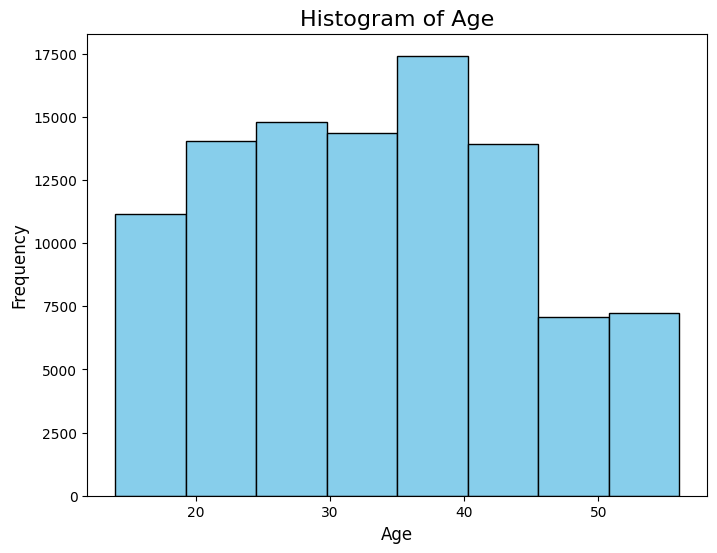

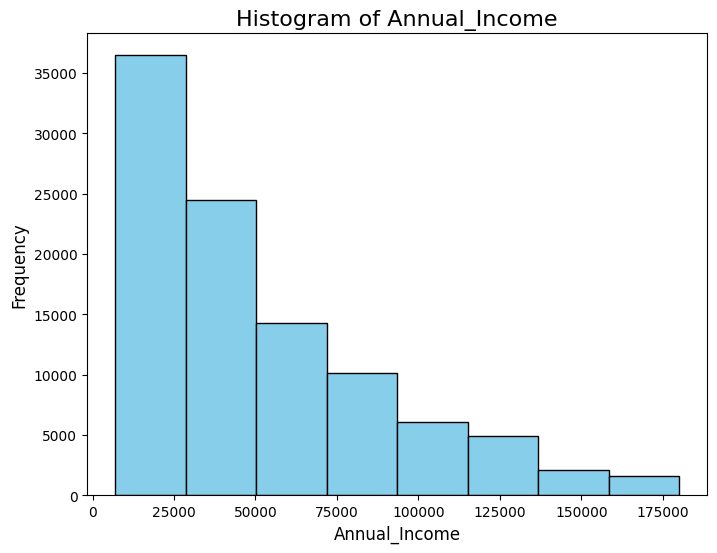

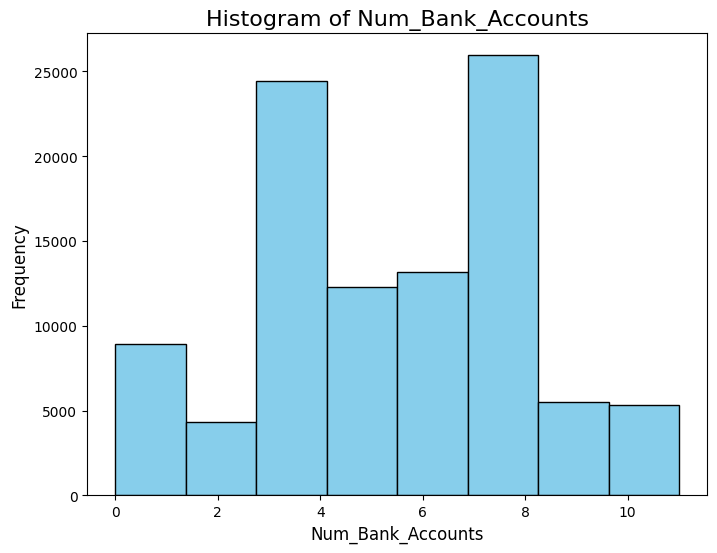

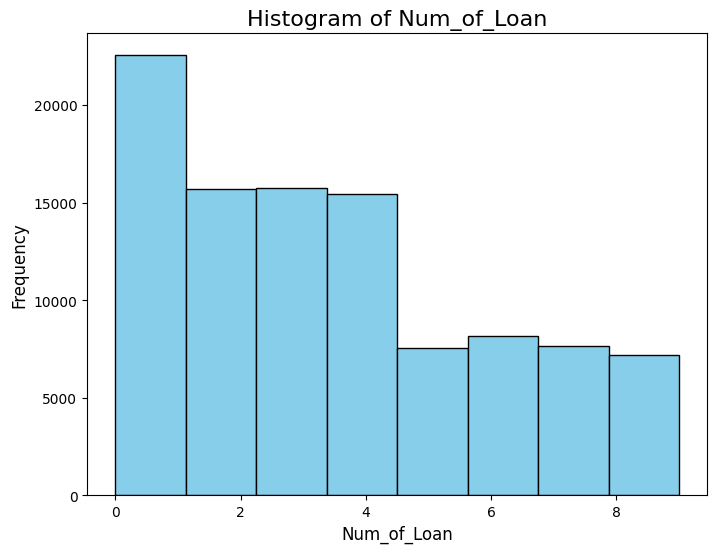

In [ ]:
import numpy as np  # Import NumPy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
selected_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan', 'Credit_Score']
data_subset = data[selected_columns]

# Display the first few rows of the subset
print(data_subset.head())

# Plot histograms for the selected columns
for column in selected_columns[:-1]:  # Exclude the target column ('Credit_Score') from histogram
    plt.figure(figsize=(8, 6))
    data_subset[column].hist(bins=8, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)
    plt.show()

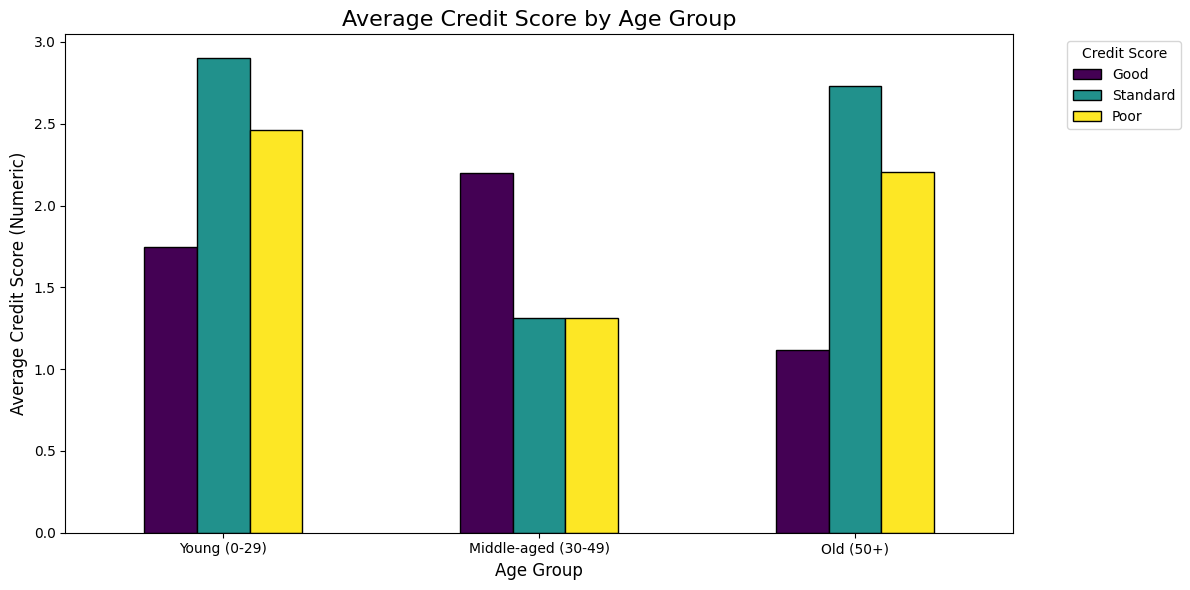

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define Age Groups
age_groups = ['Young (18-29)', 'Middle-aged (30-49)', 'Old (50+)']
credit_scores = ['Good', 'Standard', 'Poor']

# Generate random average scores for demonstration
np.random.seed(42)  # For reproducibility
random_averages = {
    group: np.random.uniform(1, 3, size=len(credit_scores)) for group in age_groups
}

# Convert to a DataFrame for plotting
average_scores = pd.DataFrame(random_averages, index=credit_scores).T

# Plot the Data
average_scores.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Customize the Plot
plt.title('Average Credit Score by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Credit Score (Numeric)', fontsize=12)
plt.xticks(rotation=0)  # Keep Age Group labels horizontal
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the Plot
plt.show()

